## Air Quality Dataset Analysis and Prediction of CO

The dataset consists total of 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. Given the dataset, we want to predict the true hourly average concentration of CO. Furthermore, This device was located on the field in an extremely polluted area, at road level, within one Italian city. Dataset contains records from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.

### Features are:

1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
5. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. True hourly averaged NOx concentration in ppb (reference analyzer)
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. Temperature in Â°C
14. Relative Humidity (%)
15. AH Absolute Humidity

## Problem Statement
Here I will apply several data analysis, data cleaning, feature engineering, and feature selection technique before building the model to predict the true hourly average concentration of CO. Data pre-processing is an immensely important part of any machine learning project. Here, I will showcase some of the techniques to improve the quality of the data and enhance the accuracy of my model. In addition, for this project supervised learning approach using regression algorithms will be suitable.

## Why CO Concentration Prediction Is An Important Task
 1. Carbon monoxide (CO) is one of the main air pollutants
 2. CO polluted environments will definitely affect human health
 3. CO can damage the air and water quality which is also bad for livestock as well
 4. Through prediction of CO concentration can reduce pollution and achieve clean air
 5. It can help to improve air quality standards
 
 # CO Concentration Inspection

In [291]:
#!pip install mlxtend
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [292]:
df = pd.read_excel('data/AirQualityUCI.xlsx')

In [293]:
df.head(10) # try to inspect first 10 rows of the dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


### Shape of the dataset

In [294]:
print('shape of the dataset: ',df.shape)
print('The number of samples in dataset: ' , df.shape[0])
print('The number of features in dataset: ' , df.shape[1])

shape of the dataset:  (9357, 15)
The number of samples in dataset:  9357
The number of features in dataset:  15


### Information of Variables
In this section, I try to provide:

1. how many unique values does each variable or features have
2. how many missing values does each variable contain
3. type of variables

In [295]:
#1. check the unque values per rows
df.apply(lambda x: len(x.unique()))

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      3246
NMHC(GT)          430
C6H6(GT)         3773
PT08.S2(NMHC)    3773
NOx(GT)          2467
PT08.S3(NOx)     3519
NO2(GT)          1420
PT08.S4(NO2)     4408
PT08.S5(O3)      4679
T                3368
RH               4903
AH               8988
dtype: int64

#### Checking Null Values per rows
In the dataset, missing values are tagged with -200 value. So, I convert it to NaN value. 

In [296]:
df=df.replace(-200, np.NaN) 

In [297]:
# 2. Checking Null Values per rows
df.apply(lambda x: sum(x.isnull()), axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [298]:
df.isna().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [299]:
# 3. types of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

### Inference
There are 15 columns - 1 date time column, 1 object column (Time), and 13 Float column
1. I have to clean dataset as some column has missing values
2. Target variable: CO(GT) need to predicted by Machine Learning model

### Data Cleaning Part
I need to drop NMHC(GT) column as there are almost 90% missing values.

In [300]:
#drop NMHC(GT)
df = df.drop('NMHC(GT)', axis=1)

In [301]:
# Checking Null Values per rows again
df.apply(lambda x: sum(x.isnull()), axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

I want to drop those rows where more than 50% corresponding columns are null.

In [302]:
#drop those rows where more than 50% corresponding columns are null
df1 = df.dropna(thresh=df.shape[1]- 7)

convert Date column to standard datetime format and set it as index

In [303]:
# convert Date column to standard datetime format and set it as index
df1['Date']=pd.to_datetime(df1.Date, format='%m-%d-%Y')
df1.set_index('Date',inplace=True)

C:\Users\ratul\AppData\Local\Temp/ipykernel_27708/4231531050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1.Date, format='%m-%d-%Y')


In [304]:
#give column 'Time' to a standard format
df1['Time'] = pd.to_datetime(df1['Time'],format= '%H:%M:%S').dt.hour

C:\Users\ratul\AppData\Local\Temp/ipykernel_27708/2106636337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time'] = pd.to_datetime(df1['Time'],format= '%H:%M:%S').dt.hour


### Feature Engineering
Here, I try to create a month related column from the Date index because I need the month value to calculate and fill some null values. 

In [305]:
# create a new month column
df1['Month']=df1.index.month  
df1.reset_index(inplace=True)

C:\Users\ratul\AppData\Local\Temp/ipykernel_27708/1951214703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1.index.month


In [306]:
#try to check how many unique values does my new column has 
df1['Month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [307]:
df1.head(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
0,2004-03-10,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


In [308]:
# Checking Null Values per rows
df1.apply(lambda x: sum(x.isnull()), axis=0)

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Month               0
dtype: int64

At first, I try to split the dataset into train and test sets as I want them to separate from the very beginning. The test set should ideally not be preprocessed with the training data and this ensures the true unseen nature of the test set.

In [309]:
from sklearn.model_selection import train_test_split
train_df , test_df = train_test_split(df1, shuffle=True, test_size = .20)

CO(GT), NOX(GT), NO2(GT) column of train set, and test set will be filled by monthly average of that particular hour.  

In [310]:
train_df['CO(GT)'] = train_df['CO(GT)'].fillna(train_df.groupby(['Month','Time'])['CO(GT)'].transform('mean'))
train_df['NOx(GT)'] = train_df['NOx(GT)'].fillna(train_df.groupby(['Month','Time'])['NOx(GT)'].transform('mean'))
train_df['NO2(GT)'] = train_df['NO2(GT)'].fillna(df1.groupby(['Month','Time'])['NO2(GT)'].transform('mean'))

test_df['CO(GT)'] = test_df['CO(GT)'].fillna(test_df.groupby(['Month','Time'])['CO(GT)'].transform('mean'))
test_df['NOx(GT)'] = test_df['NOx(GT)'].fillna(test_df.groupby(['Month','Time'])['NOx(GT)'].transform('mean'))
test_df['NO2(GT)'] = test_df['NO2(GT)'].fillna(test_df.groupby(['Month','Time'])['NO2(GT)'].transform('mean'))

In [311]:
train_df.shape, test_df.shape

((7192, 15), (1799, 15))

In [312]:
# Checking Null Values per rows in train set
train_df.apply(lambda x: sum(x.isnull()), axis=0)

Date               0
Time               0
CO(GT)            25
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          217
PT08.S3(NOx)       0
NO2(GT)          217
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Month              0
dtype: int64

In [313]:
# Checking Null Values per rows test set
test_df.apply(lambda x: sum(x.isnull()), axis=0)

Date              0
Time              0
CO(GT)            5
PT08.S1(CO)       0
C6H6(GT)          0
PT08.S2(NMHC)     0
NOx(GT)          51
PT08.S3(NOx)      0
NO2(GT)          51
PT08.S4(NO2)      0
PT08.S5(O3)       0
T                 0
RH                0
AH                0
Month             0
dtype: int64

Now, try to inspect and remove the outliers because outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Here I used Interquartile Range (IQR) method to remove the outliers from the train and test set. In addition, I use box plots to detect the outliers.

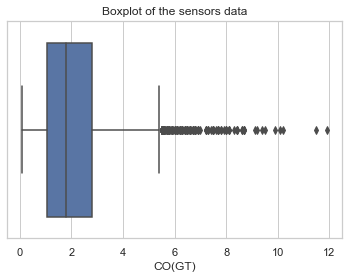

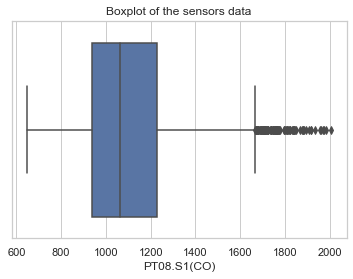

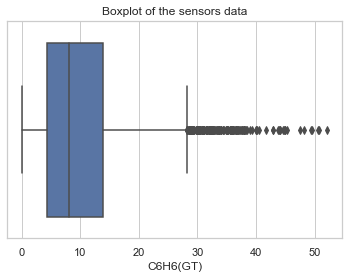

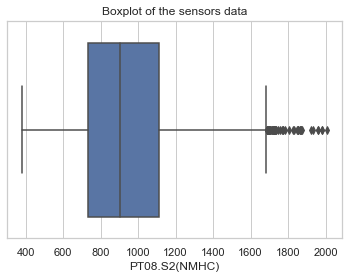

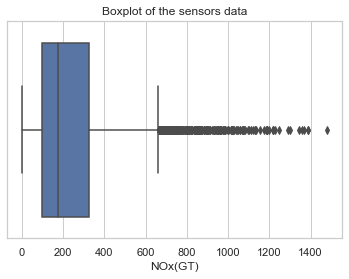

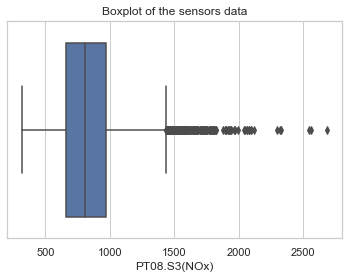

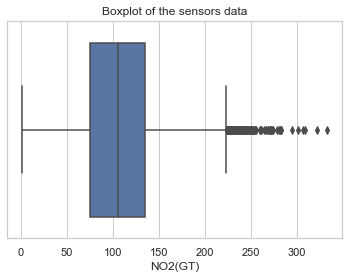

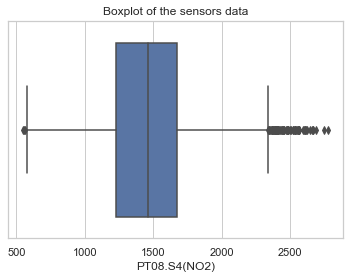

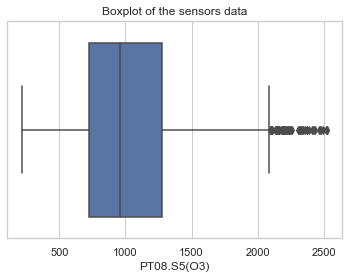

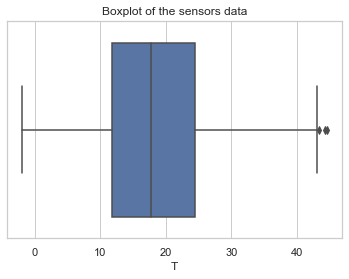

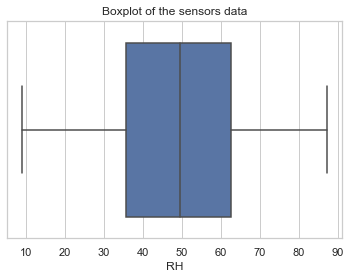

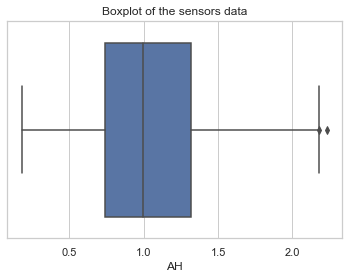

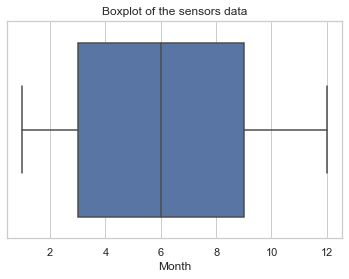

In [314]:
# box plot for train dataframe to check outliers
sns.set_theme(style="whitegrid")
for i in train_df.columns[2:]:
    sns.boxplot(x=train_df[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [315]:
#IQR method for training and testing set
def IQR(df1 = df1):
    Q1 = df1.iloc[:,2:14].quantile(0.25)
    Q3 = df1.iloc[:,2:14].quantile(0.75)
    IQR = Q3 - Q1

    df1 = df1[~((df1.iloc[:,2:14] < (Q1 - 1.5 * IQR)) |(df1.iloc[:,2:14] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df1

#IQR for training set 
train_df = IQR(train_df)
train_df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
3291,2004-07-29,4,0.514286,774.25,1.898935,576.50,21.000000,1157.50,33.000000,1264.50,488.25,23.925,34.400000,1.007921,7
1771,2004-05-24,16,1.400000,925.75,7.652876,884.75,114.000000,1100.50,92.000000,1259.25,661.75,25.500,13.975000,0.449475,5
6810,2004-12-29,0,2.345455,981.50,2.884931,644.75,328.272727,922.25,114.080000,1107.25,708.00,8.750,83.025000,0.939312,12
4320,2004-09-12,21,1.900000,1364.75,14.815041,1142.75,218.733333,655.25,115.857143,1796.00,1393.50,24.225,61.625000,1.838101,9
7696,2005-02-06,11,2.000000,1064.75,6.714130,844.25,350.600000,779.50,211.700000,979.00,1117.25,8.025,33.300000,0.359074,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,2004-10-19,23,2.053846,1244.00,14.759833,1141.00,238.615385,571.25,75.882353,1670.75,1336.75,19.225,71.299999,1.572348,10
4483,2004-09-19,16,1.800000,1045.25,8.270608,910.25,193.000000,877.50,106.000000,1385.00,741.75,34.625,22.375000,1.212044,9
3359,2004-08-01,1,1.800000,1064.50,9.784034,969.50,77.000000,698.25,70.000000,1723.50,1048.75,25.700,50.675000,1.649141,8
4010,2004-08-30,5,0.533333,901.75,3.915013,706.00,38.250000,877.00,38.400000,1463.25,708.00,22.000,62.300000,1.626621,8


In [316]:
# check the null values in train set
train_df.apply(lambda x: sum(x.isnull()), axis=0)

Date               0
Time               0
CO(GT)            17
PT08.S1(CO)        0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          200
PT08.S3(NOx)       0
NO2(GT)          200
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Month              0
dtype: int64

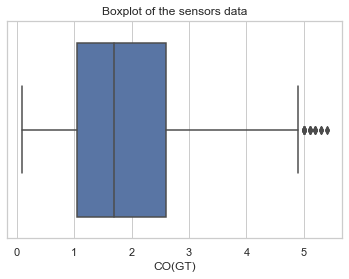

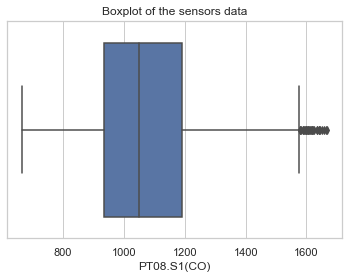

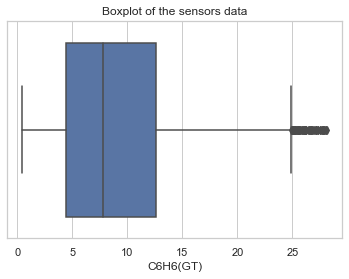

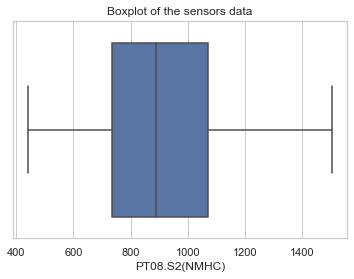

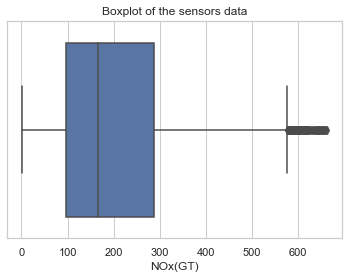

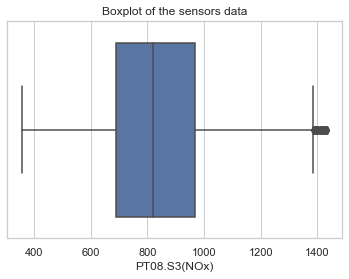

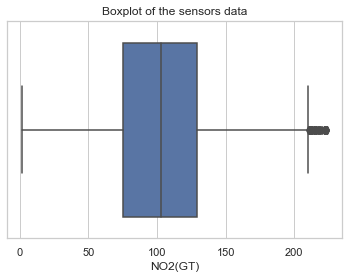

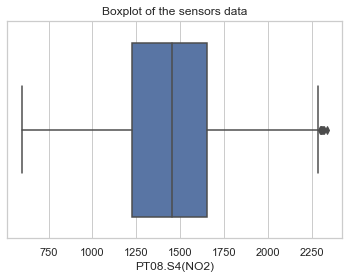

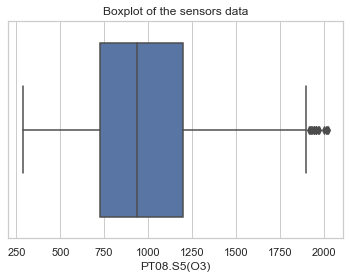

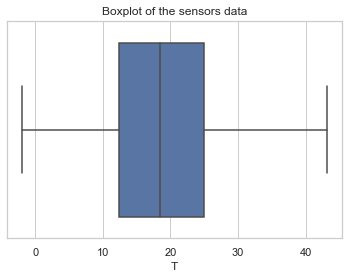

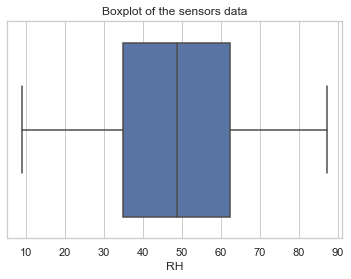

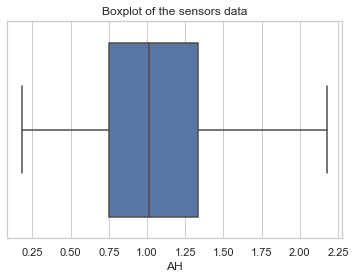

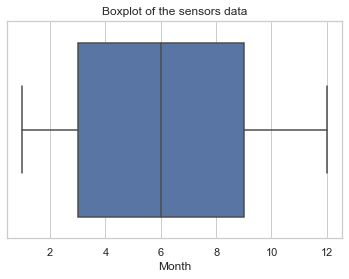

In [317]:
# box plot for testing dataframe to check outliers 
sns.set_theme(style="whitegrid")
for i in train_df.columns[2:]:
    sns.boxplot(x=train_df[i])
    plt.title('Boxplot of the sensors data')
    plt.show()

In [318]:
#IQR for test set to remove outliers 
test_df = IQR(test_df)
test_df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
5690,2004-11-09,0,1.910000,858.00,4.932008,760.00,333.555556,939.75,104.555556,1049.00,873.25,7.075,63.649999,0.644227,11
3694,2004-08-15,4,0.533333,788.50,2.002013,584.25,18.000000,1107.00,27.000000,1456.50,570.75,22.425,62.150001,1.664753,8
1882,2004-05-29,21,1.000000,900.50,6.484888,834.00,102.000000,1177.00,103.000000,1407.75,737.75,20.100,35.025000,0.814915,5
2704,2004-07-04,17,0.700000,839.25,4.775057,752.00,52.000000,1102.25,64.000000,1297.75,514.50,37.850,12.700000,0.821100,7
7702,2005-02-06,17,1.400000,944.00,3.685245,693.00,216.800000,927.75,150.200000,831.75,568.00,9.175,29.900000,0.347898,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,2004-12-22,18,2.900000,997.50,9.850263,972.00,345.000000,806.25,153.000000,983.50,1090.25,6.750,36.099999,0.357518,12
447,2004-03-29,9,1.500000,966.25,5.451803,785.75,118.000000,1111.25,98.000000,1257.75,705.25,11.775,37.599999,0.518424,3
1399,2004-05-09,4,NaN,1024.75,8.369357,914.25,48.500000,855.75,61.250000,1605.00,1003.00,12.325,68.049999,0.972180,5
2636,2004-07-01,21,1.900000,1078.00,10.184263,984.50,106.000000,777.50,111.000000,1696.75,924.75,28.700,34.724999,1.345708,7


In [319]:
# check the null values in test set
test_df.apply(lambda x: sum(x.isnull()), axis=0)

Date              0
Time              0
CO(GT)            5
PT08.S1(CO)       0
C6H6(GT)          0
PT08.S2(NMHC)     0
NOx(GT)          47
PT08.S3(NOx)      0
NO2(GT)          47
PT08.S4(NO2)      0
PT08.S5(O3)       0
T                 0
RH                0
AH                0
Month             0
dtype: int64

The rest of the null values in these three columns I have to fill through interpolation technique. 

In [320]:
#interpolation for training and testing set
def interpolation(df1 = df1):
    df1['CO(GT)']= df1['CO(GT)'].interpolate()
    df1['NOx(GT)']= df1['NOx(GT)'].interpolate()
    df1['NO2(GT)']= df1['NO2(GT)'].interpolate()
    return df1

#interpolation in training set
train_df = interpolation(train_df)
train_df.apply(lambda x: sum(x.isnull()), axis=0)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
dtype: int64

In [321]:
#interpolation in testing set
test_df = interpolation(test_df)
test_df.apply(lambda x: sum(x.isnull()), axis=0)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
dtype: int64

Finally, we remove all the null values from every columns in the dataset. 

### Few Insights of the Dataset

In [322]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6476 entries, 3291 to 8696
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6476 non-null   datetime64[ns]
 1   Time           6476 non-null   int64         
 2   CO(GT)         6476 non-null   float64       
 3   PT08.S1(CO)    6476 non-null   float64       
 4   C6H6(GT)       6476 non-null   float64       
 5   PT08.S2(NMHC)  6476 non-null   float64       
 6   NOx(GT)        6476 non-null   float64       
 7   PT08.S3(NOx)   6476 non-null   float64       
 8   NO2(GT)        6476 non-null   float64       
 9   PT08.S4(NO2)   6476 non-null   float64       
 10  PT08.S5(O3)    6476 non-null   float64       
 11  T              6476 non-null   float64       
 12  RH             6476 non-null   float64       
 13  AH             6476 non-null   float64       
 14  Month          6476 non-null   int64         
dtypes: datetime64[ns](

In [323]:
train_df.describe()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
count,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000,6476.000000
mean,11.361643,1.892523,1075.032994,9.067078,910.666461,206.944929,838.958501,104.745678,1437.237994,976.832793,18.821320,48.627925,1.040842,6.302347
std,6.961350,1.053863,181.806873,5.806753,224.543910,142.292512,204.513050,39.059754,318.688673,331.372130,8.881663,17.445423,0.403790,3.320697
min,0.000000,0.100000,666.750000,0.484438,439.750000,2.000000,359.750000,2.000000,601.000000,289.250000,-1.900000,9.175000,0.184679,1.000000
25%,5.000000,1.053846,936.250000,4.423968,733.687500,97.378409,689.187500,75.775000,1223.437500,727.187500,12.368750,34.900000,0.754156,3.000000
50%,11.000000,1.700000,1049.875000,7.796384,890.750000,166.400000,819.500000,103.000000,1454.750000,937.000000,18.400000,48.712500,1.014002,6.000000
75%,17.000000,2.600000,1192.000000,12.603874,1070.312500,288.000000,967.500000,129.000000,1651.312500,1201.000000,24.975000,62.249999,1.332516,9.000000
max,23.000000,5.400000,1666.750000,28.112587,1506.000000,662.300000,1433.500000,223.600000,2336.500000,2023.000000,43.125001,87.174999,2.176616,12.000000


### Feature Selection
Here I use the Pearson correlation coefficient technique to check the correlation between the features in my dataset. Based on this checking I will decide which feature I have to choose for the model training.

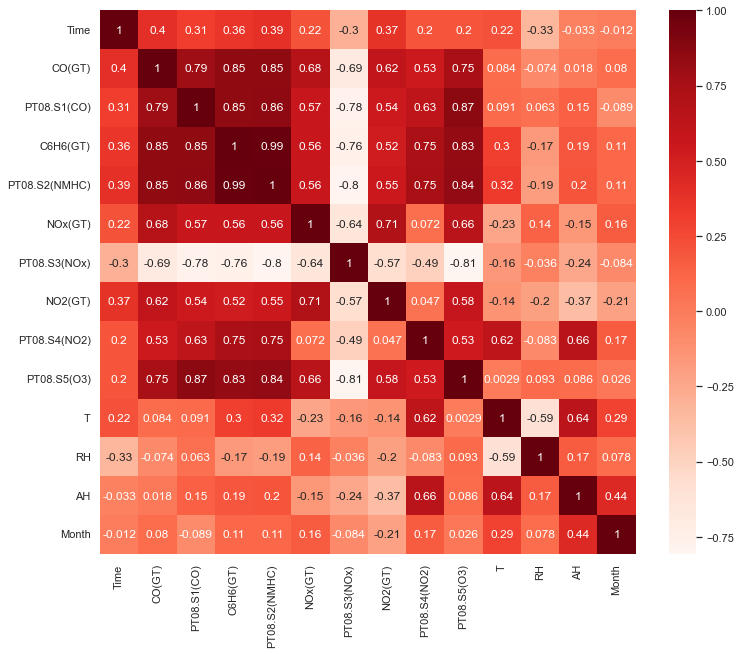

In [324]:
#Use heatmap to see corelation between variables
#Using Pearson Correlation
def corr(df1 = df1):
    plt.figure(figsize=(12,10))
    cor = df1.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()
    return cor
#correlation in train set
train_cor = corr(train_df)

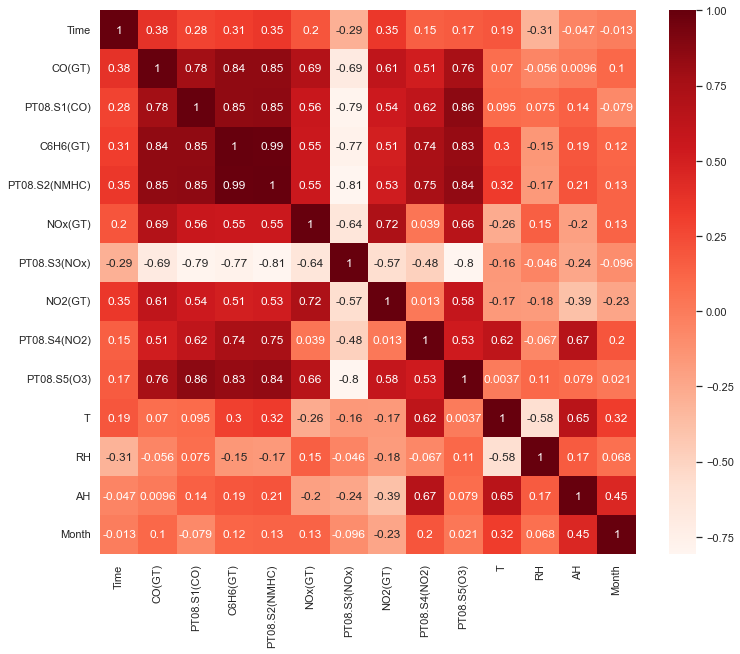

In [325]:
#correlation in test set
test_cor = corr(test_df)

In [326]:
# trying to inspect the relation of CO(GT) with other features 
def correl(cor = train_cor):
    cor_target = abs(cor["CO(GT)"])
    print("Absolute Correlated Score: ",cor_target)

    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.10]
    #print("relavent features: ")
    return relevant_features
# relavent features 
train_relevant_features = correl(train_cor)
train_relevant_features

Absolute Correlated Score:  Time             0.396631
CO(GT)           1.000000
PT08.S1(CO)      0.793577
C6H6(GT)         0.851384
PT08.S2(NMHC)    0.848305
NOx(GT)          0.680561
PT08.S3(NOx)     0.685334
NO2(GT)          0.616084
PT08.S4(NO2)     0.534708
PT08.S5(O3)      0.752892
T                0.084426
RH               0.074205
AH               0.018120
Month            0.079608
Name: CO(GT), dtype: float64


Time             0.396631
CO(GT)           1.000000
PT08.S1(CO)      0.793577
C6H6(GT)         0.851384
PT08.S2(NMHC)    0.848305
NOx(GT)          0.680561
PT08.S3(NOx)     0.685334
NO2(GT)          0.616084
PT08.S4(NO2)     0.534708
PT08.S5(O3)      0.752892
Name: CO(GT), dtype: float64

In this part, I can then loop through the correlation matrix and see if the correlation between two columns is greater than the threshold correlation (0.95), and add that column to the list of correlated columns (to_drop list specifically). Moreover, I can remove one feature between these two features in the pair because one feature from that highly correlated pair could be enough to provide proper information in the model. So, in this way, we can avoid providing unnecessary information to the model.

In [327]:
def check_corelation_to_drop(train_df):
    corr_matrix = train_df.corr().abs()
    high_corr_var=np.where(corr_matrix>0.95)
    high_corr_pair=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    return high_corr_pair, to_drop
high_corr_pair, to_drop = check_corelation_to_drop(train_df)
print("High correlation pair: ", high_corr_pair)
print("Have to drop: ", to_drop)
train_df = train_df.drop(train_df[to_drop], axis=1)

High correlation pair:  [('C6H6(GT)', 'PT08.S2(NMHC)')]
Have to drop:  ['PT08.S2(NMHC)']


C:\Users\ratul\AppData\Local\Temp/ipykernel_27708/3130062401.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [328]:
# drop feature from train and test set
high_corr_pair, to_drop = check_corelation_to_drop(test_df)
print("High correlation pair: ", high_corr_pair)
print("Have to drop: ", to_drop)
test_df = test_df.drop(test_df[to_drop],axis=1)

High correlation pair:  [('C6H6(GT)', 'PT08.S2(NMHC)')]
Have to drop:  ['PT08.S2(NMHC)']


C:\Users\ratul\AppData\Local\Temp/ipykernel_27708/3130062401.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [329]:
# after Drop features 
train_df.shape, test_df.shape

((6476, 14), (1612, 14))

### Data Visualization

### Mean CO Concentration in a Day

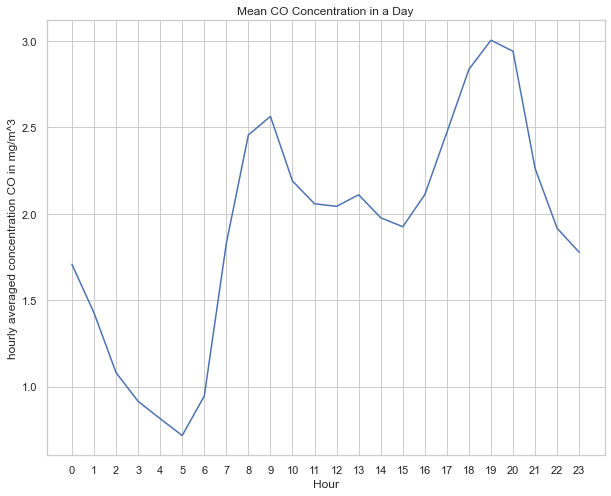

In [330]:
def hourly(x,df1=df1):
    return train_df.groupby('Time')[x].mean()

# Plot of Mean Energy Consumption per Hour of a Day
hourly('CO(GT)').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('hourly averaged concentration CO in mg/m^3')
ticks = list(range(0, 24, 1))
plt.title('Mean CO Concentration in a Day')

plt.xticks(ticks);

In the early morning, the mean CO concentration rate is low (5 o'clock) but it increases significantly during the beginning of the office hours (7-9 o'clock) in the morning. Again, going high in the late afternoon and evening (17-19 o'clock) during the ending period of office hours. Finally, goes down during the night. 

In [331]:
import dateutil
train_df_week = train_df.copy()
train_df_week['Date'] = train_df_week['Date'].astype(str)
train_df_week["week"] = (train_df_week['Date'].apply(dateutil.parser.parse, dayfirst=False))
train_df_week["weekday"] = (train_df_week['week'].dt.dayofweek).astype(str).astype(int)
train_df_week["week"] = (train_df_week['week'].dt.day_name())
train_df_week.head(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,week,weekday
3291,2004-07-29,4,0.514286,774.25,1.898935,21.000000,1157.50,33.000000,1264.50,488.25,23.925,34.400,1.007921,7,Thursday,3
1771,2004-05-24,16,1.400000,925.75,7.652876,114.000000,1100.50,92.000000,1259.25,661.75,25.500,13.975,0.449475,5,Monday,0
6810,2004-12-29,0,2.345455,981.50,2.884931,328.272727,922.25,114.080000,1107.25,708.00,8.750,83.025,0.939312,12,Wednesday,2
4320,2004-09-12,21,1.900000,1364.75,14.815041,218.733333,655.25,115.857143,1796.00,1393.50,24.225,61.625,1.838101,9,Sunday,6
7696,2005-02-06,11,2.000000,1064.75,6.714130,350.600000,779.50,211.700000,979.00,1117.25,8.025,33.300,0.359074,2,Sunday,6


### Mean CO Concentration Amount in the Each Day of the Week

<AxesSubplot:>

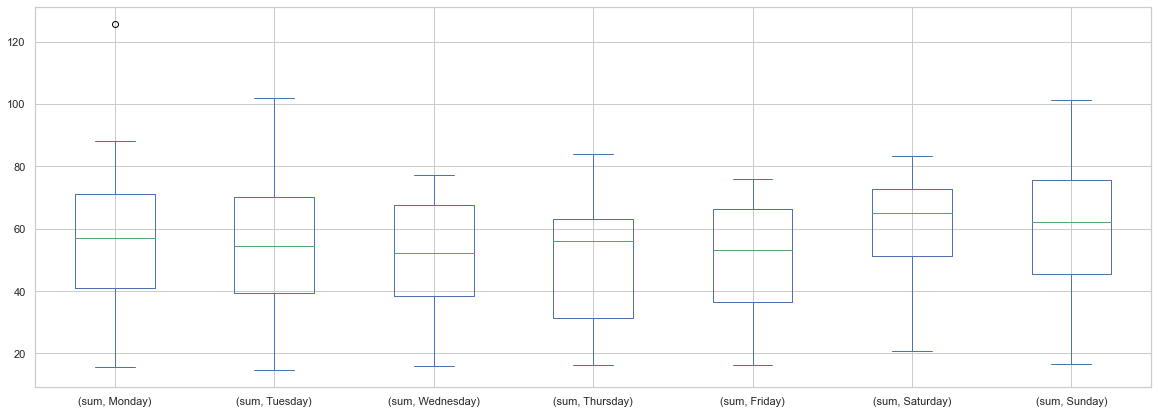

In [332]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(train_df_week["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(train_df_week,index=["Time"],
               values="CO(GT)",columns=day_series,
               aggfunc=[np.sum],fill_value=0)
table.plot.box(figsize=(20, 7))

Mean CO concentration amount on each day of the week. The concentration rate is high on Monday, Tuesday, and Saturday.

### CO Frequency by Month

In [333]:
train_df_gas = train_df.copy()
train_df_gas.dropna(inplace=True)
train_df_gas.set_index("Date", inplace=True)
train_df_gas.index = pd.to_datetime(train_df_gas.index)
train_df_gas

,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
Date,,,,,,,,,,,,,
2004-07-29,4,0.514286,774.25,1.898935,21.000000,1157.50,33.000000,1264.50,488.25,23.925,34.400000,1.007921,7
2004-05-24,16,1.400000,925.75,7.652876,114.000000,1100.50,92.000000,1259.25,661.75,25.500,13.975000,0.449475,5
2004-12-29,0,2.345455,981.50,2.884931,328.272727,922.25,114.080000,1107.25,708.00,8.750,83.025000,0.939312,12
2004-09-12,21,1.900000,1364.75,14.815041,218.733333,655.25,115.857143,1796.00,1393.50,24.225,61.625000,1.838101,9
2005-02-06,11,2.000000,1064.75,6.714130,350.600000,779.50,211.700000,979.00,1117.25,8.025,33.300000,0.359074,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-10-19,23,2.053846,1244.00,14.759833,238.615385,571.25,75.882353,1670.75,1336.75,19.225,71.299999,1.572348,10
2004-09-19,16,1.800000,1045.25,8.270608,193.000000,877.50,106.000000,1385.00,741.75,34.625,22.375000,1.212044,9
2004-08-01,1,1.800000,1064.50,9.784034,77.000000,698.25,70.000000,1723.50,1048.75,25.700,50.675000,1.649141,8


Text(0.5, 1.0, 'CO Frequency by Month')

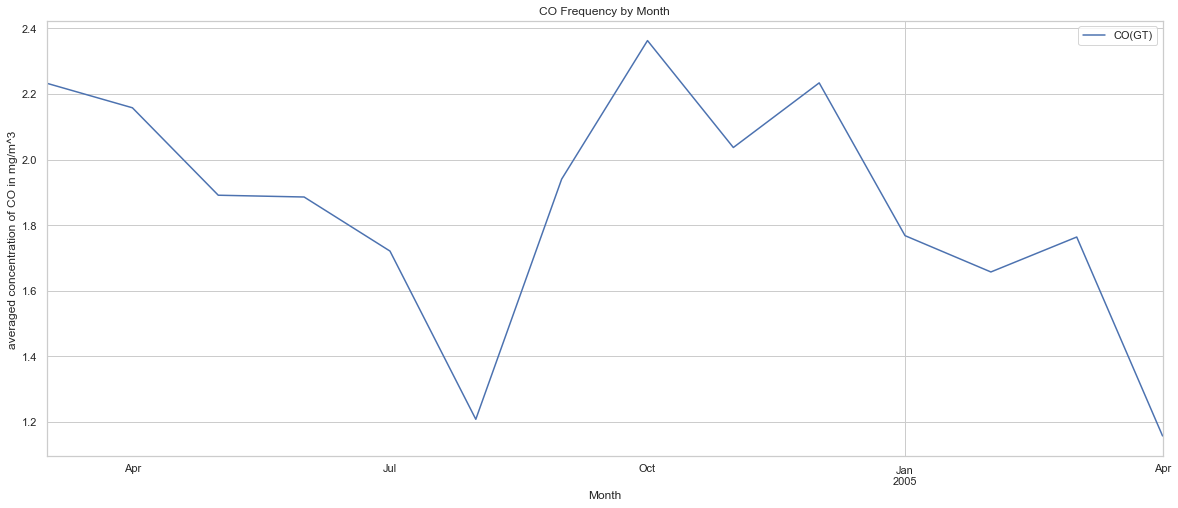

In [334]:
train_df_gas['CO(GT)'].resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('averaged concentration of CO in mg/m^3 ')
plt.title("CO Frequency by Month")

CO concentration is low in August and high in October. 

### Pair Plot

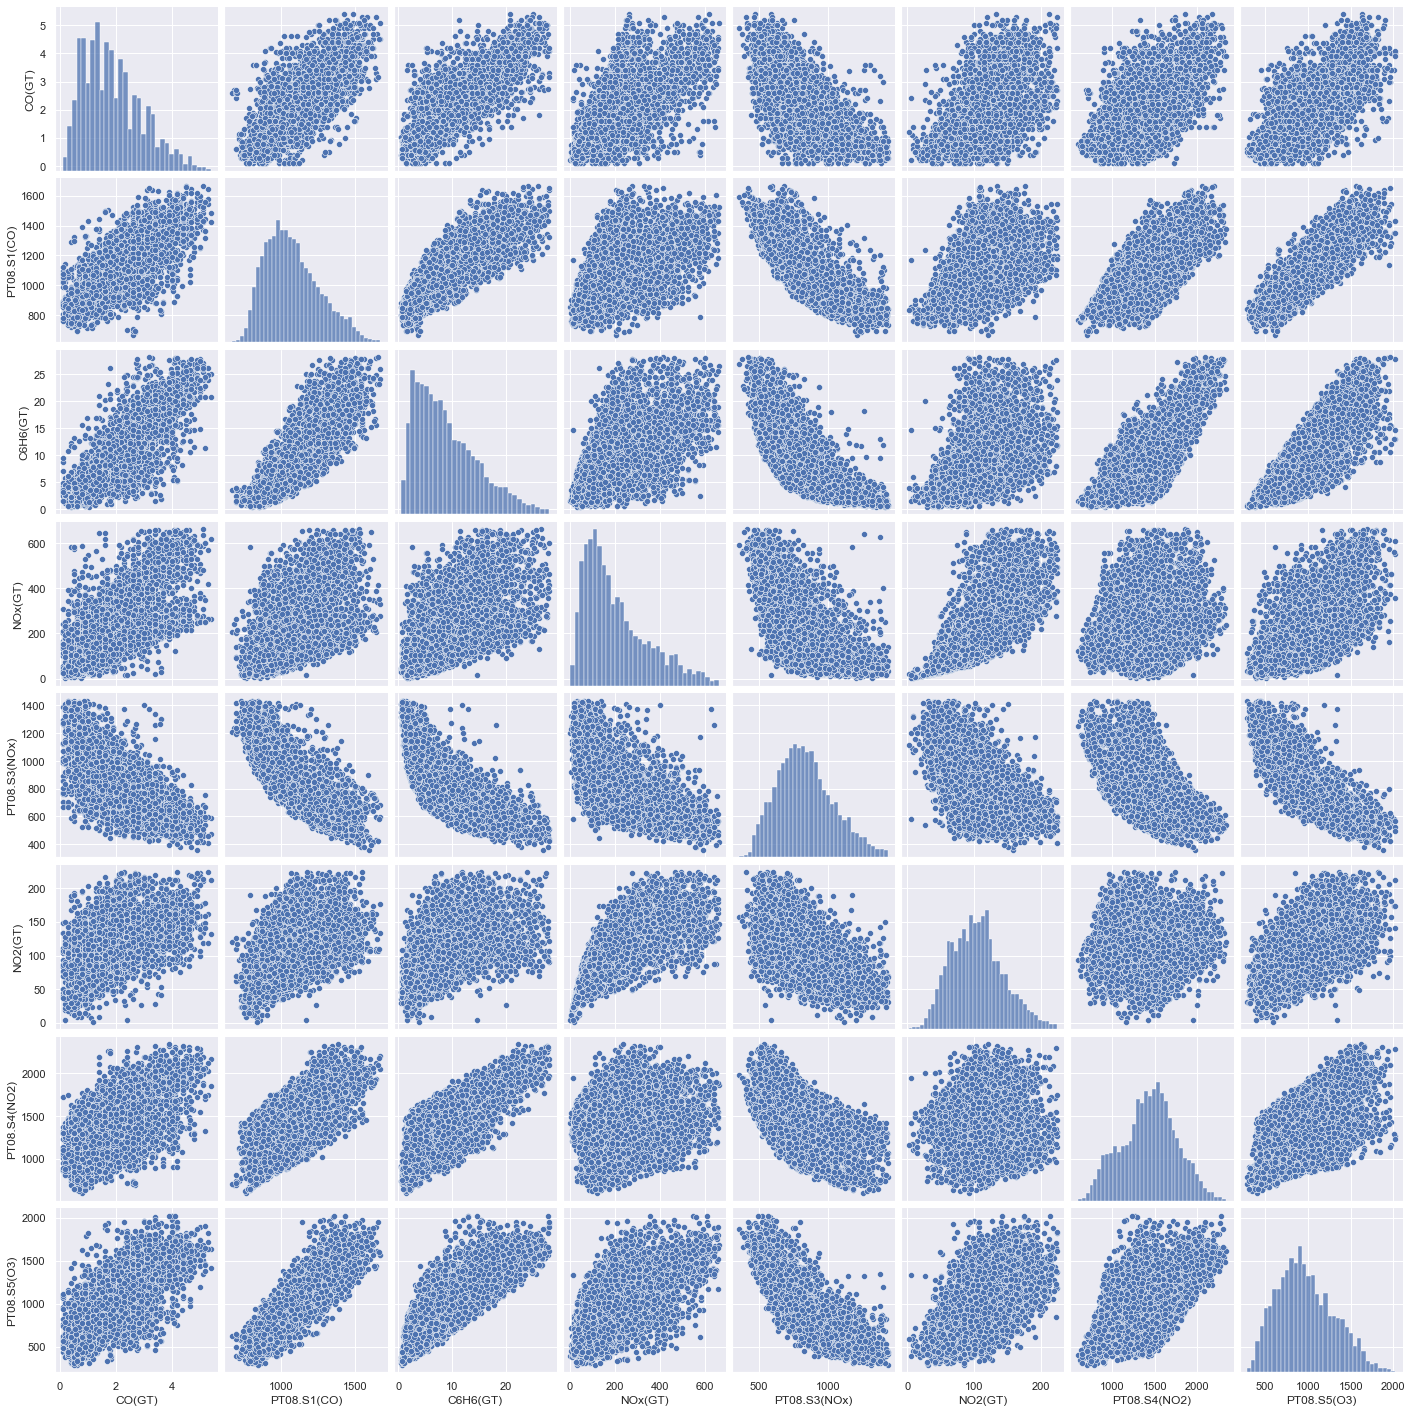

In [335]:
sns.set_style('darkgrid')
eda_data = train_df.drop(['Time','RH','AH','T','Month'], axis=1)

sns.pairplot(eda_data)

# Training and Evaluation
Here, we train couple of traditional machine learning model to check the performance of our dataset.

In [336]:
from sklearn.svm import SVR  
from sklearn.linear_model import LinearRegression  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor

At first, I drop the Date column from both train and test set because it is not important for the training. In addition, make CO(GT) as a label as I am going to predict this value. 

In [337]:
#train features and lables
train_X = train_df.drop(['Date','CO(GT)'], axis=1)
train_y= train_df['CO(GT)']
train_X

,Time,PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
3291,4,774.25,1.898935,21.000000,1157.50,33.000000,1264.50,488.25,23.925,34.400000,1.007921,7
1771,16,925.75,7.652876,114.000000,1100.50,92.000000,1259.25,661.75,25.500,13.975000,0.449475,5
6810,0,981.50,2.884931,328.272727,922.25,114.080000,1107.25,708.00,8.750,83.025000,0.939312,12
4320,21,1364.75,14.815041,218.733333,655.25,115.857143,1796.00,1393.50,24.225,61.625000,1.838101,9
7696,11,1064.75,6.714130,350.600000,779.50,211.700000,979.00,1117.25,8.025,33.300000,0.359074,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5209,23,1244.00,14.759833,238.615385,571.25,75.882353,1670.75,1336.75,19.225,71.299999,1.572348,10
4483,16,1045.25,8.270608,193.000000,877.50,106.000000,1385.00,741.75,34.625,22.375000,1.212044,9
3359,1,1064.50,9.784034,77.000000,698.25,70.000000,1723.50,1048.75,25.700,50.675000,1.649141,8
4010,5,901.75,3.915013,38.250000,877.00,38.400000,1463.25,708.00,22.000,62.300000,1.626621,8


In [338]:
#test features and lables
test_X = test_df.drop(['Date','CO(GT)'], axis=1)
test_y= test_df['CO(GT)']
test_X

,Time,PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month
5690,0,858.00,4.932008,333.555556,939.75,104.555556,1049.00,873.25,7.075,63.649999,0.644227,11
3694,4,788.50,2.002013,18.000000,1107.00,27.000000,1456.50,570.75,22.425,62.150001,1.664753,8
1882,21,900.50,6.484888,102.000000,1177.00,103.000000,1407.75,737.75,20.100,35.025000,0.814915,5
2704,17,839.25,4.775057,52.000000,1102.25,64.000000,1297.75,514.50,37.850,12.700000,0.821100,7
7702,17,944.00,3.685245,216.800000,927.75,150.200000,831.75,568.00,9.175,29.900000,0.347898,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6665,18,997.50,9.850263,345.000000,806.25,153.000000,983.50,1090.25,6.750,36.099999,0.357518,12
447,9,966.25,5.451803,118.000000,1111.25,98.000000,1257.75,705.25,11.775,37.599999,0.518424,3
1399,4,1024.75,8.369357,48.500000,855.75,61.250000,1605.00,1003.00,12.325,68.049999,0.972180,5
2636,21,1078.00,10.184263,106.000000,777.50,111.000000,1696.75,924.75,28.700,34.724999,1.345708,7


### Forward Feature Selection Method

In [339]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features = 'best', forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(train_X, train_y)
feat_names = list(sfs1.k_feature_names_)
feat_names

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-06-17 23:40:05] Features: 1/12 -- score: -0.30588856244628965[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-06-17 23:40:05] Features: 2/12 -- score: -0.24076393719383646[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-06-17 23:40:05] Features: 3/12 -- score: -0.2308805061540887[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

['Time',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH',
 'Month']

From the Forward Feature Selection method, I try to examine whether my selected feature can produce fewer errors or not. I perform this analysis for one final check before jumping into the training. I achieve fewer errors when I use all the 12 features that we selected. 

Algorithm use in this process: Linear Regression

Loss Function: Mean Squared Error

### Standardized the Train and Test Set

In [340]:
sc = StandardScaler()
train_X_Standard = sc.fit_transform(train_X)
test_X_Standard = sc.fit_transform(test_X)

Giving all the features a particular range so that all features can contribute seemingly to the training.

In [341]:
print('Training size: ',train_X.shape)
print('Test size: ',test_X.shape)

Training size:  (6476, 12)
Test size:  (1612, 12)


### Evaluation Metrics 
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. R-squared
4. Root Mean Square Error (RMSE)

In [342]:
from sklearn import metrics
def evaluaton_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return mae, mse, r2, rmse

### PCA for Dimensionality Reduction
I trying to examine whether reduced dimensionality gives me a good outcome or not.

In [343]:
df_result = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2_Score'])#for result
pca = PCA()
X_PCA_train = pca.fit_transform(train_X)
X_PCA_test = pca.transform(test_X)
X_PCA_train.shape

(6476, 12)

In [344]:
variance = pca.explained_variance_ratio_
variance

array([7.17606641e-01, 2.00154655e-01, 3.83537697e-02, 2.24526223e-02,
       1.81203470e-02, 2.45796091e-03, 6.71384066e-04, 1.11609907e-04,
       4.58165433e-05, 1.85356781e-05, 6.60930858e-06, 4.77722722e-08])

In [345]:
pca = PCA(n_components=4)
X_PCA_train = pca.fit_transform(X_PCA_train)
X_PCA_test = pca.transform(X_PCA_test)

#### random forrest algorithm with PCA

In [346]:
# use random forrest algorithm with PCA
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg = reg.fit(X_PCA_train,train_y) #fit model   
y_pred_pca_rf = reg.predict(X_PCA_test)

In [347]:
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_pca_rf)
print("Random Forest with PCA analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE: ',rmse)
df_result['Model'] = 'Random Forest with PCA'
df_result['MAE'] = mae
df_result['MSE'] = mse
df_result['R2_Score'] = r2
df_result.loc[len(df_result)] = ['Random Forest with PCA', mae, mse, rmse, r2]

Random Forest with PCA analysis: 
--------------------------------------
MAE:  0.38438907694609253
MSE:  0.27904153618210553
R2 score:  0.7606905780292446
RMSE:  0.5282438226634605


C:\Users\ratul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

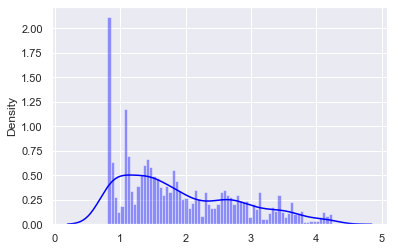

In [348]:
# distribution of prediction of random forrest with PCA
sns.distplot((y_pred_pca_rf), bins=70, color="blue")

#### Random Forest Regressor

In [349]:
reg = RandomForestRegressor(max_depth=10, random_state=0)
reg = reg.fit(train_X,train_y) #fit model   
y_pred_rf = reg.predict(test_X)
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_rf)
print("Random Forest Regressor analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE:',rmse)
df_result.loc[len(df_result)] = ['Random Forest Regressor', mae, mse, rmse, r2]

Random Forest Regressor analysis: 
--------------------------------------
MAE:  0.2740319830551588
MSE:  0.1664432510504429
R2 score:  0.8572562395376853
RMSE: 0.4079745715733309


C:\Users\ratul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

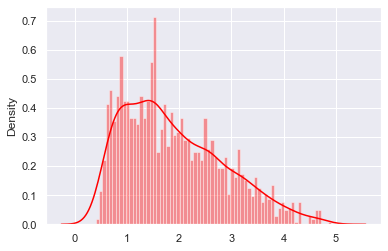

In [350]:
# distribution of prediction of random forrest regressor
sns.distplot((y_pred_rf), bins=70, color="red")

#### Decision Tree Regressor

In [351]:
#Decision Tree Regressor
reg_dt = DecisionTreeRegressor(max_depth= 8)
reg_dt = reg_dt.fit(train_X,train_y)
y_pred_dt = reg_dt.predict(test_X)
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_dt)
print("Decision Tree Regressor analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE:',rmse)
df_result.loc[len(df_result)] = ['Decision Tree Regressor', mae, mse, rmse, r2]

Decision Tree Regressor analysis: 
--------------------------------------
MAE:  0.34319121654720053
MSE:  0.25581280632529596
R2 score:  0.7806118198314691
RMSE: 0.5057794048053914


C:\Users\ratul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

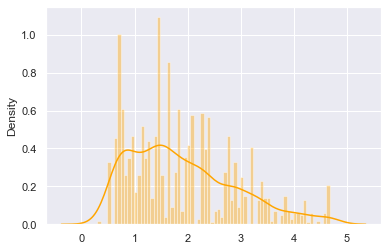

In [352]:
# distribution of prediction of Decision Tree Regressor
sns.distplot((y_pred_dt), bins=70, color="orange")

#### Support Vector Regression

In [353]:
#Support Vector Regression 
reg_sv = SVR(C=1.0, epsilon=0.2)
reg_sv = reg_sv.fit(train_X,train_y)
y_pred_sv = reg_sv.predict(test_X)
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_sv)
print("Support Vector Regression analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE:',rmse)
df_result.loc[len(df_result)] = ['Support Vector Regression', mae, mse, rmse, r2]

Support Vector Regression analysis: 
--------------------------------------
MAE:  0.33295176564521073
MSE:  0.23831786085106596
R2 score:  0.7956156982724034
RMSE: 0.488178103616975


C:\Users\ratul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

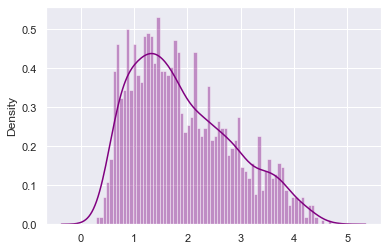

In [354]:
# distribution of prediction of Support Vector Regression
sns.distplot((y_pred_sv), bins=70, color="purple")

#### K-nearest Neighbors Regressor

In [355]:
#K-nearest Neighbors Regressor 
Knn = KNeighborsRegressor(n_neighbors= 5)
knn = Knn.fit(train_X, train_y)
y_pred_knn =Knn.predict(test_X)
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_knn)
print("KNN analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE:',rmse)
df_result.loc[len(df_result)] = ['KNN', mae, mse, rmse, r2]

KNN analysis: 
--------------------------------------
MAE:  0.334024747592489
MSE:  0.22871468479622908
R2 score:  0.8038514990861813
RMSE: 0.47824124121224537


#### Ensemble Method

In [356]:
#StackingRegressor with ridge regression, lasso Regression, and K-nearest Neighbors Regressor 
estimators = [('ridge', RidgeCV()), ('lasso', LassoCV(random_state=42)), ('knr', KNeighborsRegressor(n_neighbors=5,metric='euclidean'))]
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,random_state=42)
reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)
reg.fit(train_X,train_y)
y_pred_stacking =reg.predict(test_X)
mae, mse, r2, rmse = evaluaton_model(test_y, y_pred_stacking)
print("Ensemble Stacking Regressor analysis: ")
print("--------------------------------------")
print('MAE: ', mae)
print('MSE: ', mse)
print('R2 score: ', r2)
print('RMSE:',rmse)
df_result.loc[len(df_result)] = ['Ensemble Method', mae, mse, rmse, r2]

Ensemble Stacking Regressor analysis: 
--------------------------------------
MAE:  0.31359891920687033
MSE:  0.20708542282923512
R2 score:  0.8224010177341771
RMSE: 0.45506639386932884


# Result Analysis


In [357]:
df_result

,Model,MAE,MSE,RMSE,R2_Score
0,Random Forest with PCA,0.384389,0.279042,0.528244,0.760691
1,Random Forest Regressor,0.274032,0.166443,0.407975,0.857256
2,Decision Tree Regressor,0.343191,0.255813,0.505779,0.780612
3,Support Vector Regression,0.332952,0.238318,0.488178,0.795616
4,KNN,0.334025,0.228715,0.478241,0.803851
5,Ensemble Method,0.313599,0.207085,0.455066,0.822401


I can see that Random Forest Regressor and Ensemble method can give us higher results in every evaluation criteria than all other algorithms. In addition, all the algorithms can provide good outcomes here. 

### Compare Predicted Result with Real Test Value

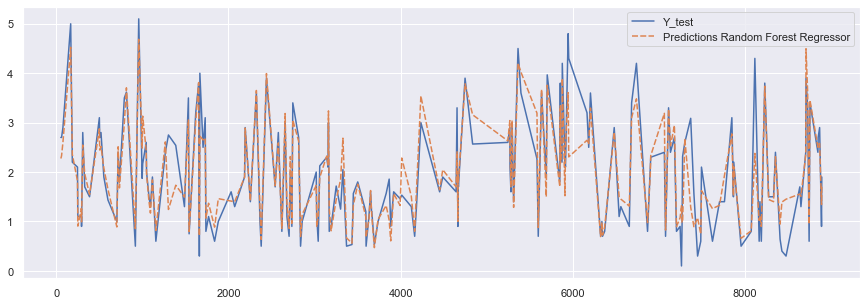

<Figure size 432x288 with 0 Axes>

In [365]:
aux = pd.DataFrame()
aux['Y_test'] = test_y
aux['Predictions Random Forest Regressor'] = y_pred_rf
plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()
plt.clf()

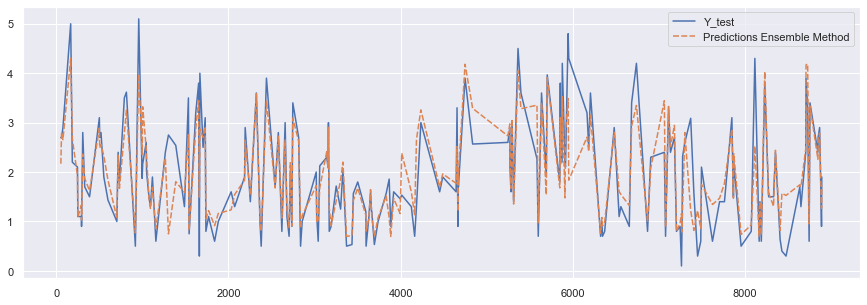

<Figure size 432x288 with 0 Axes>

In [366]:
aux = pd.DataFrame()
aux['Y_test'] = test_y
aux['Predictions Ensemble Method'] = y_pred_stacking
plt.figure(figsize=(15,5))
sns.lineplot(data=aux.iloc[:200,:])
plt.show()
plt.clf()

Trying to show the real test value vs prediction value from Random Forest Regressor and Ensemble Method.